In [ ]:
# Import dependencies
import csv
import os
from classification_report_generator import generate_classification_report

In [3]:
def process_synsets(input_tsv_path, output_tsv_path, threshold):
    """
    Function to process a TSV file, assigning prediction labels based on given criteria.
    Param:
        input_tsv_path (str): Path to the input TSV file.
        output_tsv_path (str): Path to the output TSV file.
        threshold (str): Threshold value for prediction label assignment.
    Returns:
        None
    """
    with open(input_tsv_path, 'r', encoding='utf-8') as tsv_file:
        reader = csv.DictReader(tsv_file, delimiter='\t')
        rows = list(reader)

    with open(output_tsv_path, 'w', newline='', encoding='utf-8') as tsv_file:
        writer = csv.writer(tsv_file, delimiter='\t')
        writer.writerow(['synset', 'lemma', 'annotation', 'prediction label'])

        for row in rows:
            synset = row['synset']
            lemma = row['lemma']
            annotation = row['annotation']
            goodness_label = row['goodness label']
            confidence_score = row['confidence']
            language = row['language']
            
            label = assign_label(synset, confidence_score, language, goodness_label, threshold)

            writer.writerow([synset, lemma, annotation, label])

    print(f"Prediction labels saved to '{output_tsv_path}' successfully.")


In [2]:
## Condition 1
def assign_label(synset, confidence_score, language, goodness_label, threshold):
    if confidence_score == threshold and language == 'English':
        return 'DELETE'
    else:
        return 'KEEP'

input_tsv_path = './data/merged_file_opus.tsv'
output_tsv_path = './predictions_results/opus_condition_one.tsv'
threshold = '1'
process_synsets(input_tsv_path, output_tsv_path, threshold)

Prediction labels saved to './predictions_results/opus_condition_one.tsv' successfully.


In [4]:
## Condition 2
def assign_label(synset, confidence_score, language, goodness_label, threshold):
    if confidence_score < threshold:
        return 'DELETE'
    # For confidence score 0 or 'None'
    elif confidence_score == 'None':
        return 'DELETE'
    else:
        return 'KEEP'

input_tsv_path = './data/merged_file_opus.tsv'
output_tsv_path = './predictions_results/opus_condition_two.tsv'
threshold = '2'
process_synsets(input_tsv_path, output_tsv_path, threshold)

Prediction labels saved to './predictions_results/opus_condition_two.tsv' successfully.


In [4]:
# Condition 3
def assign_label(synset, confidence_score, language, goodness_label, threshold):
    if confidence_score == '1' and 'English' in language:
        return 'DELETE'
    elif confidence_score == '2' and 'English' in language:
        return 'DELETE'
    return 'KEEP'

input_tsv_path = './data/merged_file_opus.tsv'
output_tsv_path = './predictions_results/opus_condition_three.tsv'
process_synsets(input_tsv_path, output_tsv_path, threshold=None)


Prediction labels saved to './predictions_results/opus_condition_three.tsv' successfully.


In [5]:
## Condition 4
def assign_label(synset, confidence_score, language, goodness_label, threshold):
    if confidence_score < threshold:  # No need to convert confidence_score to int since it's already handled
        return 'DELETE'
    elif confidence_score == '1' and 'English' in language:
        return 'DELETE'
    elif confidence_score == '2' and 'English' in language:
        return 'DELETE'
    else:
        return 'KEEP'

input_tsv_path = './data/merged_file_opus.tsv'
output_tsv_path = './predictions_results/opus_condition_four.tsv'
threshold = '2'
process_synsets(input_tsv_path, output_tsv_path, threshold)

Prediction labels saved to './predictions_results/opus_condition_four.tsv' successfully.


In [8]:
## Condition 5
def assign_label(synset, confidence_score, language, goodness_label, threshold):
    if goodness_label == 'O' and synset.endswith('-v') and confidence_score == threshold and language == 'English': #0.5199
        return 'DELETE'
    elif goodness_label == 'X' and synset.endswith('-v') and confidence_score == threshold and language == 'English':
        return 'DELETE'
    else:
        return 'KEEP'

input_tsv_path = './data/merged_file_opus.tsv'
output_tsv_path = './predictions_results/opus_condition_five.tsv'
threshold = '1'
process_synsets(input_tsv_path, output_tsv_path, threshold)

Prediction labels saved to './predictions_results/opus_condition_five.tsv' successfully.


Generating classification report for file: opus_condition_trial.tsv
Confusion Matrix:
True Positive (TP): 730
True Negative (TN): 5297
False Positive (FP): 834
False Negative (FN): 485
Precision: 0.46675191815856776
Recall: 0.6008230452674898
F1-score: 0.5253688377114069


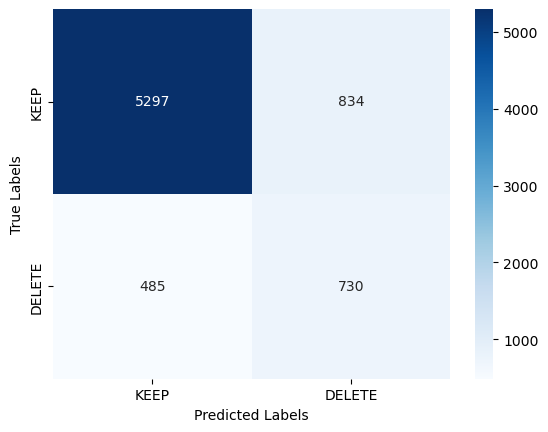


Generating classification report for file: opus_condition_five_eval.tsv
Confusion Matrix:
True Positive (TP): 327
True Negative (TN): 3718
False Positive (FP): 379
False Negative (FN): 500
Precision: 0.4631728045325779
Recall: 0.3954050785973398
F1-score: 0.426614481409002


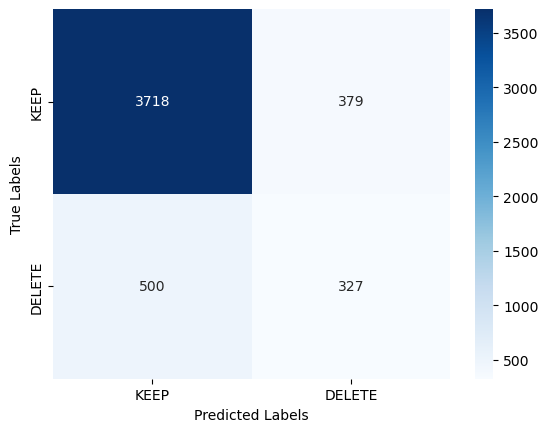


Generating classification report for file: opus_condition_five.tsv
Confusion Matrix:
True Positive (TP): 482
True Negative (TN): 5530
False Positive (FP): 601
False Negative (FN): 733
Precision: 0.4450600184672207
Recall: 0.39670781893004115
F1-score: 0.41949521322889466


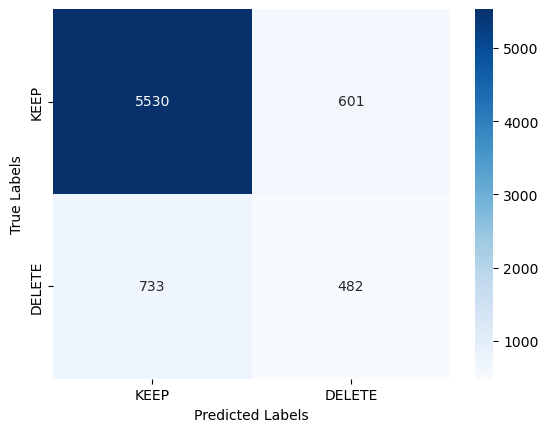


Generating classification report for file: opus_condition_three.tsv
Confusion Matrix:
True Positive (TP): 746
True Negative (TN): 3134
False Positive (FP): 2997
False Negative (FN): 469
Precision: 0.1993053700240449
Recall: 0.6139917695473252
F1-score: 0.3009277934651069


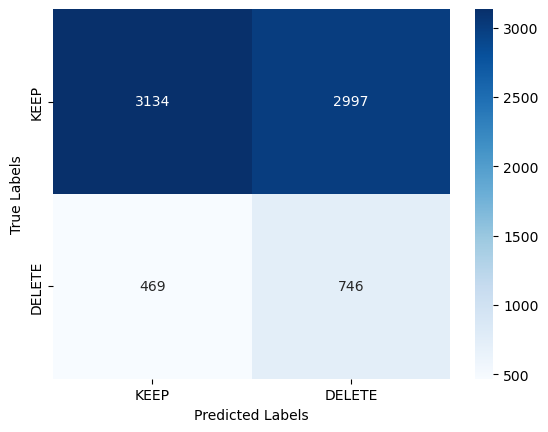


Generating classification report for file: opus_condition_two.tsv
Confusion Matrix:
True Positive (TP): 1206
True Negative (TN): 223
False Positive (FP): 5908
False Negative (FN): 9
Precision: 0.16952488051728984
Recall: 0.9925925925925926
F1-score: 0.28959058710529473


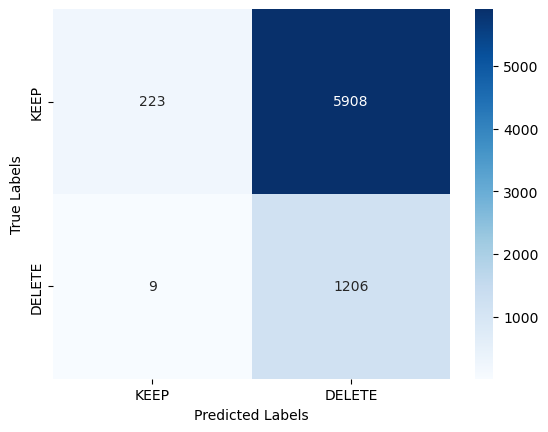


Generating classification report for file: opus_condition_four.tsv
Confusion Matrix:
True Positive (TP): 1147
True Negative (TN): 1293
False Positive (FP): 4838
False Negative (FN): 68
Precision: 0.19164578111946534
Recall: 0.9440329218106996
F1-score: 0.3186111111111112


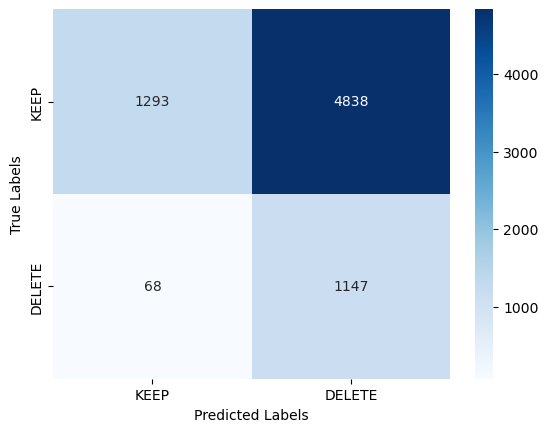


Generating classification report for file: opus_condition_one.tsv
Confusion Matrix:
True Positive (TP): 738
True Negative (TN): 3275
False Positive (FP): 2856
False Negative (FN): 477
Precision: 0.20534223706176963
Recall: 0.6074074074074074
F1-score: 0.30692451653150343


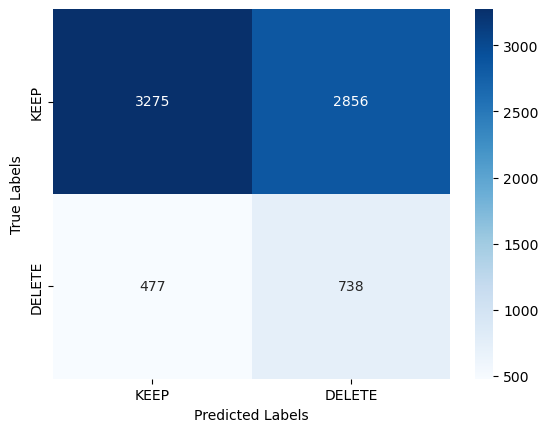

In [5]:
folder_path = 'predictions_results'

for filename in os.listdir(folder_path):
    if filename.endswith('.tsv'):
        file_path = os.path.join(folder_path, filename)
        print(f"Generating classification report for file: {filename}")
        generate_classification_report(file_path)
        print() 
